# Performance comparison ilp post-processing vs. Lipton et. al. approach

Both are compared on training data to see which algorithm finds the optimal fairness-accuracy trade-off

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount=True)
% cd gdrive/My Drive/Masterarbeit
!pip install ortools 
!pip install dccp 

import preprocess 
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
import sklearn
import torch
import torch.nn as nn
import torch.utils


from ortools.linear_solver import pywraplp


from algorithms_new import PP_Logistic
from algorithms_new import Lipton

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

churn        = pd.read_csv('churn.csv')
credit       = pd.read_csv('german.data', delimiter=' ')
compas       = pd.read_csv('compas.csv')
adult        = pd.read_csv('Dataset.data', delimiter = ' ', header = None)
student      = pd.read_csv('student-por.csv', sep = ';')
large_credit = pd.read_excel('default of credit card clients.xls', header = 1, index_col = 0)


churn        = preprocess.pre_process_churn(churn)
credit       = preprocess.pre_process_credit(credit)
compas       = preprocess.pre_process_compas(compas)
adult        = preprocess.pre_process_adult(adult)
student      = preprocess.pre_process_student(student)
large_credit = preprocess.pre_process_large_credit(large_credit)



Mounted at /content/gdrive/
/content/gdrive/My Drive/Masterarbeit


## Definition of pp algorithms
The get_optimal_thresholds function computes the integer linear program as described in the master's thesis. For both post-processesing algorithms, a new logistic regression is fit for every thresholds computed in this script. That is inefficient, but does not really matter with colab computing power.

## Credit Data set

Both algorithms are run with the same fairness levels. ILP is in orange, Lipton in blue. ILP already takes effect when no constraints are binding, as the 0.5 threshold may not be optimal.

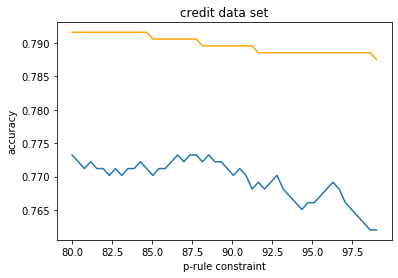

In [0]:

results_Lipton = {}
results_PP_Logistic = {}

data_set           = credit
sensitive_variable = credit.columns.get_loc('age_old')

index_train    = np.floor(data_set.shape[0]*0.98).astype(int)
index_validate = np.floor(data_set.shape[0]*0.99).astype(int)

for i,p in enumerate(np.linspace(80,99, 50)):
  model_L    = Lipton(data_set, index_train, index_validate, sensitive_variable)
  results_Lipton[i] = model_L.fit_predict(p) 
  model_ILP  = PP_Logistic(data_set, index_train, index_validate, sensitive_variable)
  results_PP_Logistic[i] = model_ILP.fit_predict(100/p) 

lipton_df = pd.DataFrame.from_dict({i : results_Lipton[i]['train_statistics'] for i in range(50)}, orient = 'index')
pp_df     = pd.DataFrame.from_dict({i : results_PP_Logistic[i]['train_statistics'] for i in range(50)}, orient = 'index')
plt.plot(np.linspace(80,99, 50), lipton_df.accuracy)
plt.plot(np.linspace(80,99, 50), pp_df.accuracy, color = 'orange')
plt.ylabel('accuracy')
plt.xlabel('p-rule constraint')
plt.title('credit data set')
plt.savefig('lipton_new/accuracy_credit.png')


Black is the required level of fairness. Behaviour is as expected: Lipton is always slightly above that, whereas ILP thresholding at times reaches much higher levels of fairness, when this leads to higher accuracy

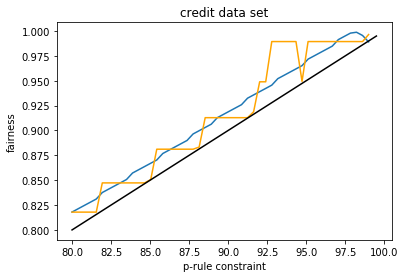

In [0]:
plt.plot(np.linspace(80,99, 50), lipton_df.fairness)
plt.plot(np.linspace(80,99, 50), pp_df.fairness, color = 'orange')
plt.plot(np.linspace(80,99.5, 50), np.linspace(80,99.5, 50) / 100, color = 'black')
plt.ylabel('fairness')
plt.xlabel('p-rule constraint')
plt.title('credit data set')
plt.savefig('lipton_new/credit_fairness.png')



## Compas data set

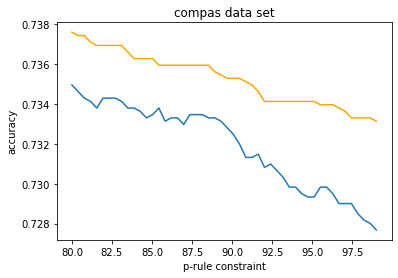

In [0]:
results_Lipton = {}
results_PP_Logistic = {}

data_set           = compas
sensitive_variable = compas.columns.get_loc('race_factor_Caucasian')


index_train    = np.floor(data_set.shape[0]*0.98).astype(int)
index_validate = np.floor(data_set.shape[0]*0.99).astype(int)

for i,p in enumerate(np.linspace(80,99, 50)):
  model_L    = Lipton(data_set, index_train, index_validate, sensitive_variable)
  results_Lipton[i] = model_L.fit_predict(p) 
  model_ILP  = PP_Logistic(data_set, index_train, index_validate, sensitive_variable)
  results_PP_Logistic[i] = model_ILP.fit_predict(100/p) 

lipton_df = pd.DataFrame.from_dict({i : results_Lipton[i]['train_statistics'] for i in range(50)}, orient = 'index')
pp_df     = pd.DataFrame.from_dict({i : results_PP_Logistic[i]['train_statistics'] for i in range(50)}, orient = 'index')
plt.plot(np.linspace(80,99, 50), lipton_df.accuracy)
plt.plot(np.linspace(80,99, 50), pp_df.accuracy, color = 'orange')
plt.ylabel('accuracy')
plt.xlabel('p-rule constraint')
plt.title('compas data set')
plt.savefig('lipton_new/compas_accuracy.png')




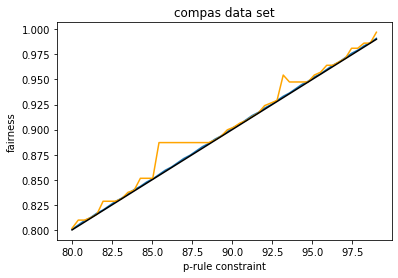

In [0]:
plt.plot(np.linspace(80,99, 50), lipton_df.fairness)
plt.plot(np.linspace(80,99, 50), pp_df.fairness, color = 'orange')
plt.plot(np.linspace(80,99, 50), np.linspace(80,99, 50) / 100, color = 'black')
plt.ylabel('fairness')
plt.xlabel('p-rule constraint')
plt.title('compas data set')
plt.savefig('lipton_new/compas_fairness.png')

# Adult data set

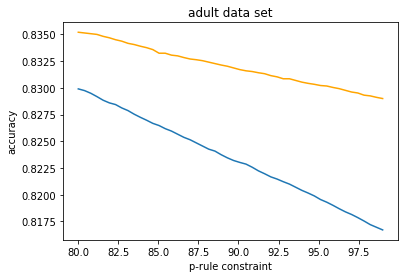

In [0]:
results_Lipton = {}
results_PP_Logistic = {}

data_set           = adult
sensitive_variable = adult.columns.get_loc('Gender_Male')


index_train    = np.floor(data_set.shape[0]*0.98).astype(int)
index_validate = np.floor(data_set.shape[0]*0.99).astype(int)

for i,p in enumerate(np.linspace(80,99, 50)):
  model_L    = Lipton(data_set, index_train, index_validate, sensitive_variable)
  results_Lipton[i] = model_L.fit_predict(p) 
  model_ILP  = PP_Logistic(data_set, index_train, index_validate, sensitive_variable)
  results_PP_Logistic[i] = model_ILP.fit_predict(100/p) 

lipton_df = pd.DataFrame.from_dict({i : results_Lipton[i]['train_statistics'] for i in range(50)}, orient = 'index')
pp_df     = pd.DataFrame.from_dict({i : results_PP_Logistic[i]['train_statistics'] for i in range(50)}, orient = 'index')
plt.plot(np.linspace(80,99, 50), lipton_df.accuracy)
plt.plot(np.linspace(80,99, 50), pp_df.accuracy, color = 'orange')
plt.ylabel('accuracy')
plt.xlabel('p-rule constraint')
plt.title('adult data set')
plt.savefig('lipton_new/adult_accuracy.png')




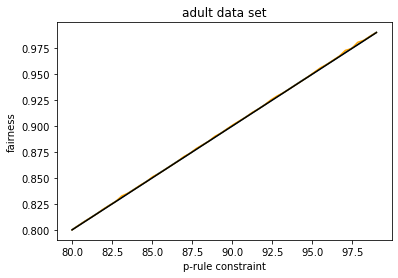

In [0]:
plt.plot(np.linspace(80,99, 50), lipton_df.fairness)
plt.plot(np.linspace(80,99, 50), pp_df.fairness, color = 'orange')
plt.plot(np.linspace(80,99, 50), np.linspace(80,99, 50) / 100, color = 'black')
plt.ylabel('fairness')
plt.xlabel('p-rule constraint')
plt.title('adult data set')
plt.savefig('lipton_new/adult_fairness.png')

/content/gdrive/My Drive/Masterarbeit/preprocess.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.Categorical(df[col], categories=df[col].unique()).codes
/content/gdrive/My Drive/Masterarbeit/preprocess.py:269: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.program_duration = ((pd.to_datetime(df.V31_data_fi_programa,infer_datetime_format=True) - pd.to_datetime(df.V30_data_inici_programa,infer_datetime_format=True))/np.timedelta64(1, 's')).astype(float)
/content/gdrive/My Drive/Masterarbeit/preprocess.py:273: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.py

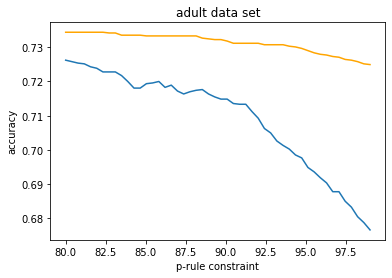

In [0]:
reincidencia = pd.read_excel('reincidencia.xlsx')
reincidencia = preprocess.pre_process_reincidencia(reincidencia)

results_Lipton = {}
results_PP_Logistic = {}

data_set           = reincidencia
sensitive_variable = reincidencia.columns.get_loc('V1_sexe_1')


index_train    = np.floor(data_set.shape[0]*0.98).astype(int)
index_validate = np.floor(data_set.shape[0]*0.99).astype(int)

for i,p in enumerate(np.linspace(80,99, 50)):
  model_L    = Lipton(data_set, index_train, index_validate, sensitive_variable)
  results_Lipton[i] = model_L.fit_predict(p) 
  model_ILP  = PP_Logistic(data_set, index_train, index_validate, sensitive_variable)
  results_PP_Logistic[i] = model_ILP.fit_predict(100/p) 

lipton_df = pd.DataFrame.from_dict({i : results_Lipton[i]['train_statistics'] for i in range(50)}, orient = 'index')
pp_df     = pd.DataFrame.from_dict({i : results_PP_Logistic[i]['train_statistics'] for i in range(50)}, orient = 'index')
plt.plot(np.linspace(80,99, 50), lipton_df.accuracy)
plt.plot(np.linspace(80,99, 50), pp_df.accuracy, color = 'orange')
plt.ylabel('accuracy')
plt.xlabel('p-rule constraint')
plt.title('adult data set')
plt.savefig('lipton_new/reincidencia_accuracy.png')


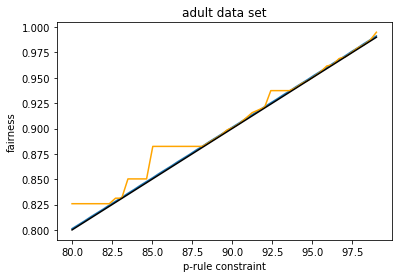

In [0]:
plt.plot(np.linspace(80,99, 50), lipton_df.fairness)
plt.plot(np.linspace(80,99, 50), pp_df.fairness, color = 'orange')
plt.plot(np.linspace(80,99, 50), np.linspace(80,99, 50) / 100, color = 'black')
plt.ylabel('fairness')
plt.xlabel('p-rule constraint')
plt.title('adult data set')
plt.savefig('lipton_new/residencia_fairness.png')